In [43]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


In [45]:
data_tarin_path='Documents/My projects/adar/dataset/train'
#data_train_test='Documents/My projects/adar/adar/test'
data_val_path='Documents/My projects/adar/dataset/val'

In [47]:
img_width=180
img_lenth=180

In [49]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_tarin_path,
    shuffle=True,
    image_size=(img_width,img_lenth),
    batch_size=32,
    validation_split=False)


Found 694 files belonging to 2 classes.


In [51]:
data_cat=data_train.class_names

In [53]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width,img_lenth),
    batch_size=32,
    shuffle=False,
    validation_split=False) 

Found 192 files belonging to 2 classes.


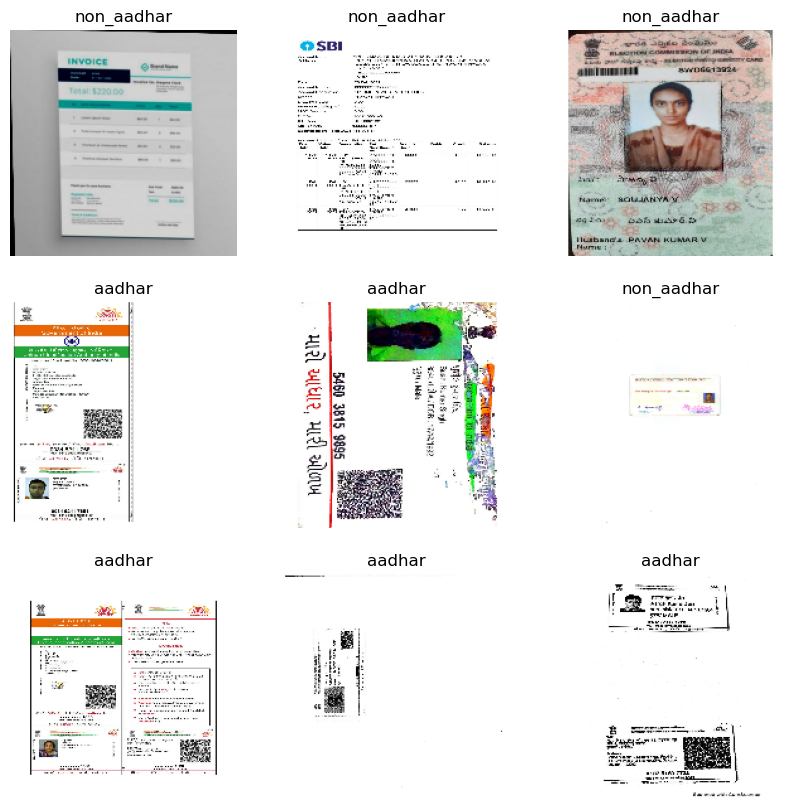

In [55]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [56]:
from tensorflow.keras.models import Sequential

In [59]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [61]:
model=Sequential([
    layers.Rescaling(1./225),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])       

In [63]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])


In [72]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)


Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 599ms/step - accuracy: 0.9919 - loss: 0.0439 - val_accuracy: 0.8333 - val_loss: 1.2224
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 604ms/step - accuracy: 0.9544 - loss: 0.1921 - val_accuracy: 0.8229 - val_loss: 0.9801
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 616ms/step - accuracy: 0.9658 - loss: 0.0780 - val_accuracy: 0.8385 - val_loss: 1.1716
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 611ms/step - accuracy: 0.9735 - loss: 0.1041 - val_accuracy: 0.8490 - val_loss: 1.5181
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 611ms/step - accuracy: 0.9871 - loss: 0.0352 - val_accuracy: 0.8385 - val_loss: 1.3237
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 623ms/step - accuracy: 0.9771 - loss: 0.0949 - val_accuracy: 0.8542 - val_loss: 1.1576
Epoch 7/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 625ms/step - accuracy: 0.9925 - loss: 0.0312 - val_accuracy: 0.8490 - val_loss: 1.3220
Epoch 8/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 609ms/step - accuracy: 0.9921 - loss: 0.0190 - val_accu

Text(0.5, 1.0, 'Loss')

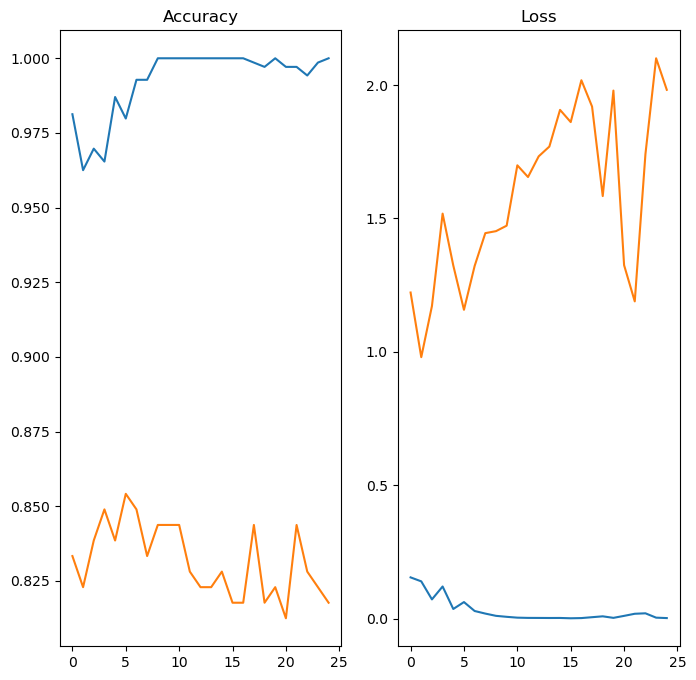

In [87]:

epochs_range = range(epochs_size)  # Correct the range variable
plt.figure(figsize=(8, 8))  # Fixed extra parenthesis
plt.subplot(1, 2, 1)  # Corrected subplot index for accuracy plot
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.subplot(1, 2, 2)  # Corrected subplot index for loss plot
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')


In [105]:
image='Documents/My projects/adar/dataset/1.jpeg'
image=tf.keras.utils.load_img(image,target_size=(img_lenth,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [107]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [109]:
score=tf.nn.softmax(predict)

In [111]:
print('image is {} with ACCURACY of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100)) 

image is aadhar with ACCURACY of 100.00
